## Подготовка

In [ ]:
! gdown --id '1zEQlvd2z8QSgcwNNljIjxKi4lAOaaibp'

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zEQlvd2z8QSgcwNNljIjxKi4lAOaaibp
To: /content/credit_risk_dataset.csv
100% 1.80M/1.80M [00:00<00:00, 186MB/s]


In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/credit_risk_dataset.csv')

## EDA

#### Датафрейм

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Пустые значения и дубликаты

In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
len(df)

32581

**Так как строк с пустыми значениями относительно немного, то в данном сдучае ими можно пренебречь.**

In [ ]:
df=df.dropna()
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
print(f"Найдено дубликатов: {df.duplicated().sum()}")

Найдено дубликатов: 137


In [ ]:
df = df.drop_duplicates()

#### Анализ данных

In [ ]:
df['loan_status'].value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

**На лицо дисбаланс классов - отклонённых заявок почти в 4 раза больше, чем одобренных!**

In [ ]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df.groupby('person_home_ownership')['loan_status'].agg(['count','mean']).round(2) \
    .sort_values(by='count',ascending=0)

,count,mean
person_home_ownership,,
RENT,14498,0.31
MORTGAGE,11736,0.13
OWN,2174,0.07
OTHER,93,0.29


<Axes: title={'center': 'Процент одобрения кредита по статусу жилья'}>

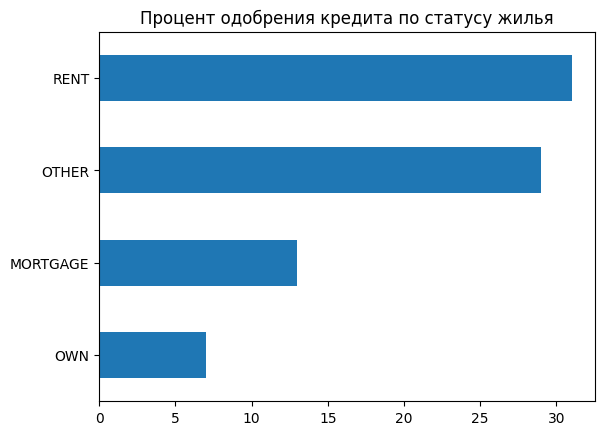

In [ ]:
df.groupby('person_home_ownership')['loan_status'].mean().round(2).multiply(100) \
    .sort_values(ascending=True).plot(kind='barh',xlabel='', ylabel='Процент одобрения', \
                                       title='Процент одобрения кредита по статусу жилья')

In [ ]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df.groupby('loan_intent',dropna=False)['loan_status'].agg(['count','mean'])

,count,mean
loan_intent,,
DEBTCONSOLIDATION,4547,0.284583
EDUCATION,5670,0.170547
HOMEIMPROVEMENT,3187,0.257295
MEDICAL,5269,0.269121
PERSONAL,4859,0.197777
VENTURE,4969,0.146508


<Axes: title={'center': 'Процент одобрения по целям кредита'}>

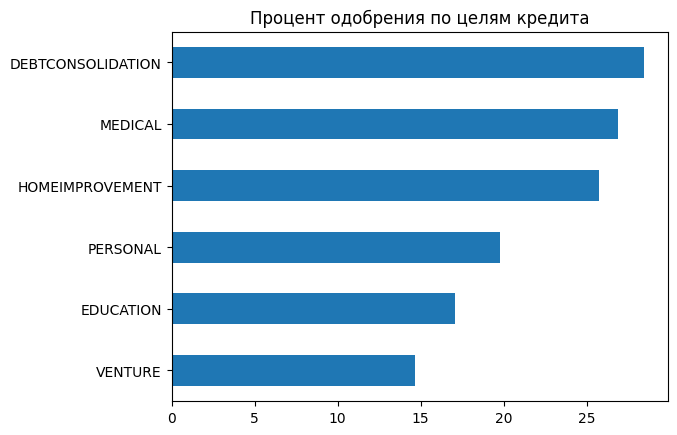

In [ ]:
df.groupby('loan_intent',dropna=False)['loan_status'].mean().multiply(100) \
      .sort_values(ascending=True).plot(kind='barh', xlabel='', ylabel='Процент одобрения', \
                                         title='Процент одобрения по целям кредита')

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<Axes: >

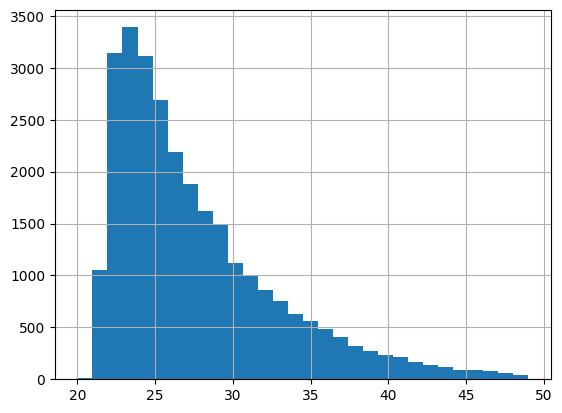

In [ ]:
q1 = df['person_age'].quantile(0.99)
age=df[df['person_age']<q1]
age['person_age'].hist(bins=30)

<Axes: >

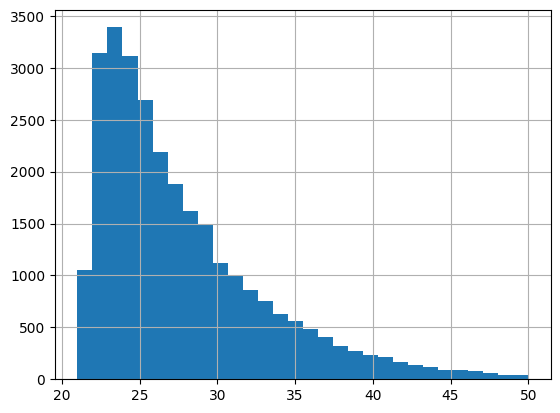

In [ ]:
q1 = df['person_age'].quantile(0.01)
q2 = df['person_age'].quantile(0.99)
df[df['person_age'].between(q1,q2)]['person_age'].hist(bins=30)

### Корреляционный анализ



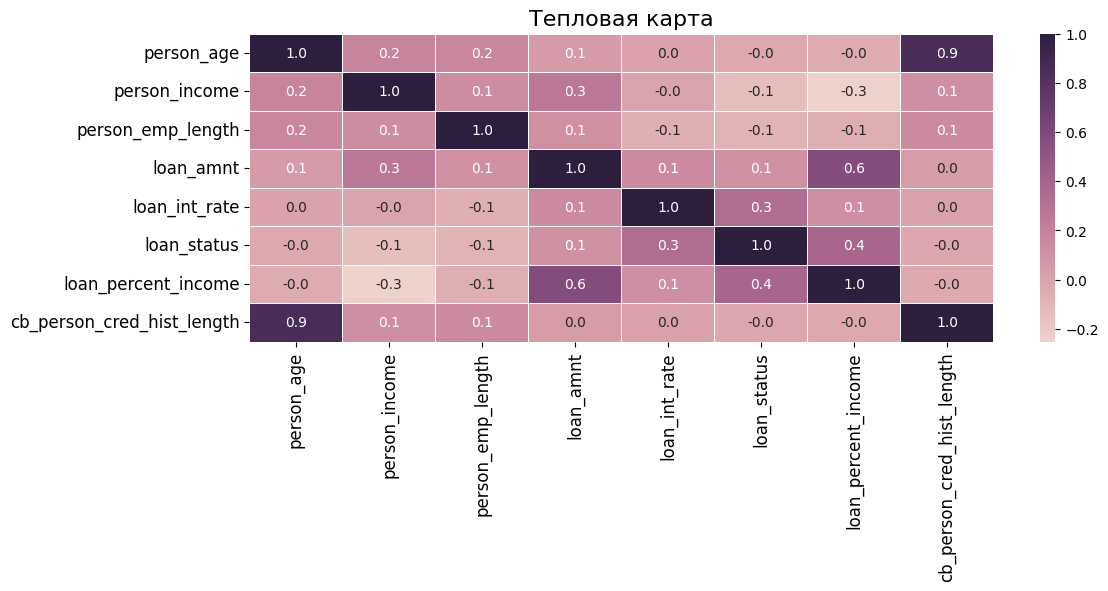

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df.corr(),annot=True, fmt=".1f", linewidth=.5, \
            cmap=sns.cubehelix_palette(as_cmap=True),annot_kws={"size":10})
plt.title('Тепловая карта', fontsize = 16)
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
t = df[['person_age', 'person_income','person_emp_length', 'loan_amnt', \
    'loan_int_rate', 'cb_person_cred_hist_length', 'loan_status']]

In [ ]:
t.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_status
0,22,59000,123.0,35000,16.02,3,1
1,21,9600,5.0,1000,11.14,2,0
2,25,9600,1.0,5500,12.87,3,1
3,23,65500,4.0,35000,15.23,2,1
4,24,54400,8.0,35000,14.27,4,1


In [ ]:
normalized_df=(t-t.min())/(t.max()-t.min())

In [ ]:
#sns.pairplot(t, hue='loan_status')

## CatBoost

#### Избавимся от аномальных значений

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.00,28501.00,28501.00,28501.00,28501.00,28501.00,28501.00,28501.00
mean,27.74,66654.41,4.79,9658.53,11.05,0.22,0.17,5.80
std,6.32,62376.03,4.16,6329.60,3.23,0.41,0.11,4.04
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,39500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,56000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,80000.00,7.00,12500.00,13.48,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


In [ ]:
df = df[df['person_age'].between(1,100)].copy()

In [ ]:
df = df[df['person_emp_length'].between(0,100)].copy()

In [ ]:
df.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28495.00,28495.00,28495.00,28495.00,28495.00,28495.00,28495.00,28495.00
mean,27.72,66430.47,4.78,9657.37,11.05,0.22,0.17,5.80
std,6.18,51513.74,4.04,6327.71,3.23,0.41,0.11,4.04
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,39480.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,56000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,80000.00,7.00,12500.00,13.48,0.00,0.23,8.00
max,84.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [ ]:
len(df)

28495

In [ ]:
df['loan_status'].value_counts()

0    22308
1     6187
Name: loan_status, dtype: int64

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


#### Делим выборку на train и test

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
cbdf =df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status','cb_person_default_on_file',
       'cb_person_cred_hist_length']].copy()

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train, val, test = \
              np.split(cbdf.sample(frac=1, random_state=42),
                       [int(.6*len(cbdf)), int(.8*len(cbdf))])

#### CatBoost'им :)

In [ ]:
X_col = ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt',
       'loan_int_rate','cb_person_cred_hist_length',
       'person_home_ownership', 'loan_intent',
        'loan_grade','cb_person_default_on_file']

cat_features = ['person_home_ownership', 'loan_intent', 'loan_grade',
                'cb_person_default_on_file']

y_col = ['loan_status']

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from catboost import Pool, cv

cv_dataset = Pool(data=train[X_col],
                  label=train[y_col],
                  cat_features=cat_features)

params = {"loss_function": "Logloss",
          "eval_metric": "AUC",
          "auto_class_weights":"Balanced",
          "learning_rate":0.5,
          'random_seed': 22,
          "verbose": 500,
          "early_stopping_rounds":50}

In [ ]:
scores = cv(cv_dataset,
            params,
            seed=42,
            shuffle=True,
            iterations=1000,
            stratified=True,
            fold_count=5)

Training on fold [0/5]
0:	test: 0.8257967	best: 0.8257967 (0)	total: 34.7ms	remaining: 34.7s

bestTest = 0.9269741999
bestIteration = 84

Training on fold [1/5]
0:	test: 0.8421912	best: 0.8421912 (0)	total: 31ms	remaining: 31s

bestTest = 0.9350357136
bestIteration = 74

Training on fold [2/5]
0:	test: 0.8236261	best: 0.8236261 (0)	total: 25.5ms	remaining: 25.5s

bestTest = 0.9334730231
bestIteration = 62

Training on fold [3/5]
0:	test: 0.8250827	best: 0.8250827 (0)	total: 34ms	remaining: 34s

bestTest = 0.9415795118
bestIteration = 37

Training on fold [4/5]
0:	test: 0.8366938	best: 0.8366938 (0)	total: 67.2ms	remaining: 1m 7s

bestTest = 0.9293559054
bestIteration = 95



<Axes: >

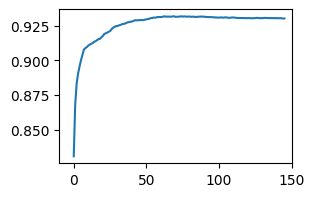

In [ ]:
scores['test-AUC-mean'].plot(xlim=(-10,150), figsize=(3,2))

<Axes: >

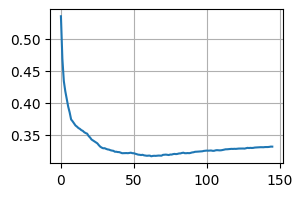

In [ ]:
scores['test-Logloss-mean'].plot(grid=True, figsize=(3,2))

In [ ]:
model = CatBoostClassifier(auto_class_weights = 'Balanced', eval_metric='AUC',
                           iterations = 200, verbose=500, learning_rate=0.5,
                           random_seed=22,
                           early_stopping_rounds=50)

In [ ]:
model.fit(train[X_col],train[y_col],eval_set=(val[X_col],val[y_col]),cat_features = cat_features)

0:	test: 0.8308465	best: 0.8308465 (0)	total: 46.6ms	remaining: 9.27s
199:	test: 0.9374318	best: 0.9381349 (189)	total: 6.26s	remaining: 0us

bestTest = 0.9381348948
bestIteration = 189

Shrink model to first 190 iterations.


##### Оценка модели

In [ ]:
test['loan_status_pred'] = model.predict(test[X_col])

In [ ]:
from sklearn.metrics import f1_score, classification_report
f1_score(test['loan_status'],test['loan_status_pred'])
print(classification_report(test['loan_status'],test['loan_status_pred']))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4439
           1       0.78      0.77      0.77      1260

    accuracy                           0.90      5699
   macro avg       0.86      0.85      0.86      5699
weighted avg       0.90      0.90      0.90      5699



**Веса для переменных**

In [ ]:
fi = pd.DataFrame({'weight':model.feature_importances_,'feature':X_col})

In [ ]:
fi.sort_values('weight',ascending=False)

,weight,feature
1,28.306045,person_income
3,15.621367,loan_amnt
6,12.703224,person_home_ownership
4,11.407177,loan_int_rate
7,8.972401,loan_intent
8,8.555201,loan_grade
2,6.250296,person_emp_length
0,4.507299,person_age
5,3.442159,cb_person_cred_hist_length
9,0.234831,cb_person_default_on_file


In [ ]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(test[X_col], test[y_col], cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc=sklearn.metrics.auc(fpr, tpr)

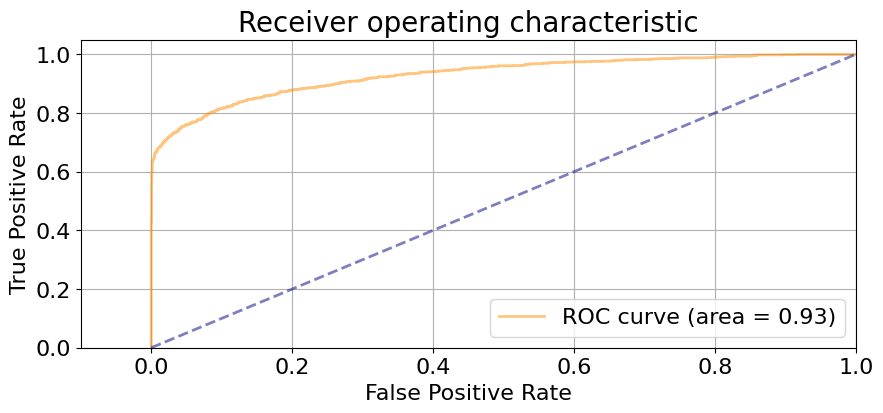

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
lw=2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

## Логистическая регрессия

In [ ]:
!gdown 1iRUTxYy4tp8l0Ee2oD_OUMUO-BnmvCeI

Downloading...
From: https://drive.google.com/uc?id=1iRUTxYy4tp8l0Ee2oD_OUMUO-BnmvCeI
To: /content/data_train.csv
100% 4.97M/4.97M [00:00<00:00, 134MB/s]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder

In [ ]:
lrdf = pd.read_csv('/content/data_train.csv',sep = ";")
lrdf = lrdf.drop(lrdf.columns[0], axis=1)
lrdf.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_0,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,23,115000,2.0,35000,7.90,0,0.30,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,500000,7.0,30000,10.65,0,0.06,0,3,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,23,120000,0.0,35000,7.90,0,0.29,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,162500,2.0,35000,7.49,0,0.22,0,4,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# lrdf = df.copy()

# from sklearn.preprocessing import OneHotEncoder
# ohenc = OneHotEncoder()

# # Столбец loan_intent
# ohe = ohenc.fit_transform(lrdf.loan_intent.values.reshape(-1,1)).toarray()
# dfOneHot = pd.DataFrame(ohe, columns = ["loan_intent_"+str(ohenc.categories_[0][i])
#                                       for i in range(len(ohenc.categories_[0]))])
# lrdf = pd.concat([lrdf, dfOneHot], axis=1)
# del lrdf['loan_intent']

# # Столбец loan_grade
# ohe1 = ohenc.fit_transform(lrdf.loan_grade.values.reshape(-1,1)).toarray()
# dfOneHot = pd.DataFrame(ohe1, columns = ["loan_grade_"+str(ohenc.categories_[0][i])
#                                        for i in range(len(ohenc.categories_[0]))])
# lrdf = pd.concat([lrdf, dfOneHot], axis=1)
# del lrdf['loan_grade']

# # Столбец person_home_ownership
# ohe2 = ohenc.fit_transform(lrdf.person_home_ownership.values.reshape(-1,1)).toarray()
# dfOneHot = pd.DataFrame(ohe2, columns = ["person_home_ownership_"+str(ohenc.categories_[0][i])
#                                        for i in range(len(ohenc.categories_[0]))])
# lrdf = pd.concat([lrdf, dfOneHot], axis=1)
# del lrdf['person_home_ownership']

# # Столбец cb_person_default_on_file
# lrdf.cb_person_default_on_file = lrdf.cb_person_default_on_file.replace(['Y','N'],[1,0])

# lrdf.head()

In [ ]:
lrdf  = lrdf.dropna()

In [ ]:
y = lrdf['loan_status']
X = lrdf.drop(['loan_status'], axis=1)

In [ ]:
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(X)
# X = imputer.transform(X)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
len(lrdf)

44311

In [ ]:
lrdf['loan_status'].value_counts()

0    22435
1    21876
Name: loan_status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# from sklearn.utils import resample
# X=pd.concat([X_train,y_train],axis=1)


# not_fraud=X[X.loan_status==0]
# fraud=X[X.loan_status==1]

# # upsample minority
# fraud_upsampled = resample(fraud,
#                           replace=True, # sample with replacement
#                           n_samples=len(not_fraud), # match number in majority class
#                           random_state=27) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([not_fraud, fraud_upsampled])

# # check new class counts
# upsampled.loan_status.value_counts()
# X_train = upsampled[X_col1]
# y_train = upsampled[y_col1]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4576
           1       0.81      0.78      0.79      4287

    accuracy                           0.80      8863
   macro avg       0.80      0.80      0.80      8863
weighted avg       0.80      0.80      0.80      8863



## Random Forest

In [ ]:
rfdf = lrdf.copy()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=50)

random_clf.fit(X_train, y_train)
y_pred_r = random_clf.predict(X_test)

# точность метода
y_test_pred = random_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_test_pred)
mse_rf = mean_squared_error(y_test, y_pred_r, squared=True)
print("Точность метода RandomForest - ", acc_rf)
print("MSE метода RandomForest - ", mse_rf)

Точность метода RandomForest -  0.9820602504795216
MSE метода RandomForest -  0.017939749520478394


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4576
           1       0.98      0.98      0.98      4287

    accuracy                           0.98      8863
   macro avg       0.98      0.98      0.98      8863
weighted avg       0.98      0.98      0.98      8863



## Нейросеть

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
nndf= lrdf.copy()

In [ ]:
nndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44311 entries, 0 to 50472
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     44311 non-null  int64  
 1   person_income                  44311 non-null  int64  
 2   person_emp_length              44311 non-null  float64
 3   loan_amnt                      44311 non-null  int64  
 4   loan_int_rate                  44311 non-null  float64
 5   loan_status                    44311 non-null  int64  
 6   loan_percent_income            44311 non-null  float64
 7   cb_person_default_on_file      44311 non-null  int64  
 8   cb_person_cred_hist_length     44311 non-null  int64  
 9   person_home_ownership_0        44311 non-null  int64  
 10  person_home_ownership_1        44311 non-null  int64  
 11  person_home_ownership_2        44311 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION  44311 non-null 

In [ ]:
# Нейросеть
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
mod = Sequential()
mod.add(Dense(24,input_dim=24, activation='relu'))
mod.add(Dropout(0.2))
mod.add(Dense(16, activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(1, activation='sigmoid'))

In [ ]:
mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse'])


In [ ]:
mod.fit(X_train, y_train, epochs=500, batch_size=250,
          verbose=0)


In [ ]:
mod.predict(X_test, batch_size=32)

277/277 [==============================] - 0s 951us/step


array([[7.6227916e-05],
       [1.8211818e-01],
       [2.9993054e-01],
       ...,
       [3.8570648e-01],
       [4.9432206e-01],
       [4.4698265e-01]], dtype=float32)

In [ ]:
y_predd = mod.predict(X_test, batch_size=1)



8863/8863 [==============================] - 9s 1ms/step


In [ ]:
y_pred_test = np.round(y_predd, 0)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4576
           1       0.96      0.73      0.83      4287

    accuracy                           0.85      8863
   macro avg       0.88      0.85      0.85      8863
weighted avg       0.87      0.85      0.85      8863



In [ ]:
score = mod.evaluate(X_test,
                             y_test,
                             batch_size=32)

277/277 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8534 - mse: 0.0997
